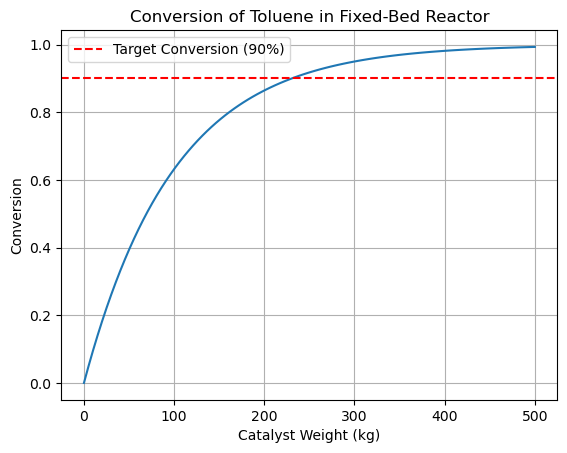

In [2]:
#Feed flow: 291.454 kmol/h Toluene, 1250.861 kmol/h H₂

#Reactor temperature: 220°C

#Conversion: 90%

#Reactor type: Fixed-bed PFR

#Stoichiometry:

#Toluene+3H2→MCHToluene+3H 2​ →MCH
#Rate constant 𝑘 kinetics assumed first order in Toluene
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
CA0 = 291.454 / 3600  # mol/s (from kmol/hr)
FH2_0 = 1250.861 / 3600  # mol/s
X_target = 0.90
k = 0.01  # s⁻¹, approximate rate constant

# Reactor Model (Assume PFR, first-order in Toluene)
def reactor_model(W, y):
    CA = y[0]
    rA = -k * CA
    return [rA]

# Initial conditions and solving
W_span = (0, 500)
sol = solve_ivp(reactor_model, W_span, [CA0], t_eval=np.linspace(0, 500, 100))
CA = sol.y[0]
conversion = (CA0 - CA) / CA0

# Plot
plt.plot(sol.t, conversion)
plt.axhline(0.90, color='red', linestyle='--', label='Target Conversion (90%)')
plt.title('Conversion of Toluene in Fixed-Bed Reactor')
plt.xlabel('Catalyst Weight (kg)')
plt.ylabel('Conversion')
plt.grid()
plt.legend()
plt.show()


In [3]:
#Hot stream: 760 kmol/h, 88.41 → 37.78 °C

#Cp (avg): ~201.05 kJ/kmol°C for MCH

#CW: 32.2 → 48.89 °C
# Given
F_hot = 760 / 3600  # kmol/s
Cp_MCH = 201.05  # kJ/kmol·°C
T_hot_in = 88.41
T_hot_out = 37.78
T_cw_in = 32.2
T_cw_out = 48.89
Cp_CW = 75.4  # kJ/kmol·°C (approx for water)

# Q from hot stream
Q = F_hot * Cp_MCH * (T_hot_in - T_hot_out)  # kJ/s

# Solve for cooling water flow rate
F_CW = Q / (Cp_CW * (T_cw_out - T_cw_in))  # kmol/s
F_CW_hr = F_CW * 3600  # kmol/hr

print(f"Required cooling water flow rate = {F_CW_hr:.2f} kmol/hr")


Required cooling water flow rate = 6147.49 kmol/hr


In [4]:
# Reactor feed
FT_in = 291.454  # kmol/h
FH2_in = 1250.861  # kmol/h
FMCH_in = 4.406  # kmol/h
X = 0.9

# Reactor outlet
FT_out = FT_in * (1 - X)
FH2_out = FH2_in - 3 * X * FT_in
FMCH_out = FMCH_in + X * FT_in

print(f"Toluene out: {FT_out:.2f} kmol/h")
print(f"Hydrogen out: {FH2_out:.2f} kmol/h")
print(f"MCH out: {FMCH_out:.2f} kmol/h")


Toluene out: 29.15 kmol/h
Hydrogen out: 463.94 kmol/h
MCH out: 266.71 kmol/h


In [5]:
#Python Code to Validate and Match Word-Based Cost Estimates:
def estimate_equipment_cost(size, size_ref, cost_ref, scaling_exponent=0.6, material_factor=1.0):
    """
    Estimate cost using scaling equation
    """
    return cost_ref * (size / size_ref) ** scaling_exponent * material_factor

# Reactor cost (Word File)
V_reactor = 1.73  # m³
C_ref_reactor = 30000  # USD for 2 m³
V_ref = 2.0
scaling_rxr = 0.65
M_rxr = 1.3  # stainless steel

reactor_cost = estimate_equipment_cost(V_reactor, V_ref, C_ref_reactor, scaling_rxr, M_rxr)

# Heat exchanger cost (Word File)
A_hex = 25  # m²
C_ref_hex = 10000  # USD for 50 m²
A_ref = 50
scaling_hex = 0.6
M_hex = 1.1  # carbon steel or alloy

hex_cost = estimate_equipment_cost(A_hex, A_ref, C_ref_hex, scaling_hex, M_hex)

# Total
total_cost = reactor_cost + hex_cost

# Output
print("--- Validated Cost Estimation (Based on Word Report) ---")
print(f"Reactor Cost: ${reactor_cost:,.2f}")
print(f"Heat Exchanger Cost: ${hex_cost:,.2f}")
print(f"Total Estimated Equipment Cost: ${total_cost:,.2f}")


--- Validated Cost Estimation (Based on Word Report) ---
Reactor Cost: $35,491.56
Heat Exchanger Cost: $7,257.29
Total Estimated Equipment Cost: $42,748.85


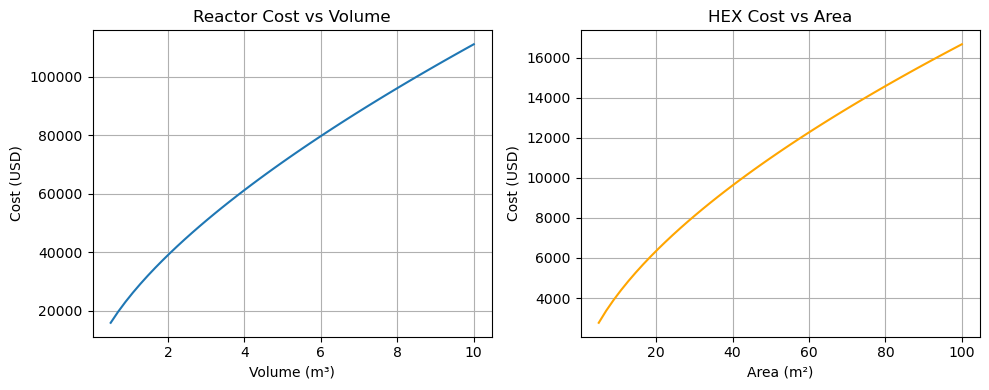

In [6]:
def estimate_equipment_cost(size, size_ref, cost_ref, scaling_exponent=0.6, material_factor=1.0):
    """
    Estimate cost using capacity factor method.
    """
    return cost_ref * (size / size_ref) ** scaling_exponent * material_factor
import numpy as np
import matplotlib.pyplot as plt

# Reactor Cost Parameters
V_ref = 2.0
C_ref_reactor = 30000
n_rxr = 0.65
M_rxr = 1.3

# Heat Exchanger Cost Parameters
A_ref = 50.0
C_ref_hex = 10000
n_hex = 0.6
M_hex = 1.1

# Reactor volume range
volumes = np.linspace(0.5, 10, 50)
costs_rxr = estimate_equipment_cost(volumes, V_ref, C_ref_reactor, n_rxr, M_rxr)

# HEX area range
areas = np.linspace(5, 100, 50)
costs_hex = estimate_equipment_cost(areas, A_ref, C_ref_hex, n_hex, M_hex)

# Plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(volumes, costs_rxr)
plt.title("Reactor Cost vs Volume")
plt.xlabel("Volume (m³)")
plt.ylabel("Cost (USD)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(areas, costs_hex, color='orange')
plt.title("HEX Cost vs Area")
plt.xlabel("Area (m²)")
plt.ylabel("Cost (USD)")
plt.grid(True)

plt.tight_layout()
plt.show()


R² Score: 0.9977
RMSE: 1778.10 USD


C:\Users\hp\OneDrive\Attachments\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


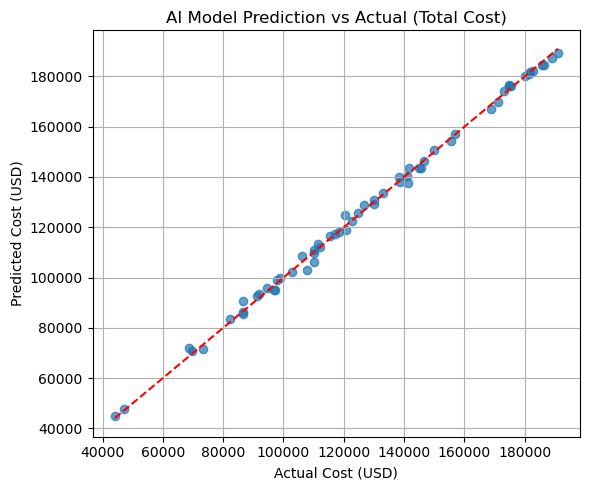

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Simulated data for large plants
np.random.seed(0)
n_samples = 300
V_samples = np.random.uniform(1, 20, n_samples)
A_samples = np.random.uniform(10, 150, n_samples)

cost_rxr_samples = estimate_equipment_cost(V_samples, V_ref, C_ref_reactor, n_rxr, M_rxr)
cost_hex_samples = estimate_equipment_cost(A_samples, A_ref, C_ref_hex, n_hex, M_hex)
total_cost_samples = cost_rxr_samples + cost_hex_samples

df_cost = pd.DataFrame({
    'Volume_m3': V_samples,
    'Area_m2': A_samples,
    'Total_Cost_USD': total_cost_samples
})

# Train-test split
X = df_cost[['Volume_m3', 'Area_m2']]
y = df_cost['Total_Cost_USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train AI model
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f} USD")

# Plot prediction
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Cost (USD)")
plt.ylabel("Predicted Cost (USD)")
plt.title("AI Model Prediction vs Actual (Total Cost)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# from the feedback slope value is determined 
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulated data for large plants
np.random.seed(0)
n_samples = 300
V_samples = np.random.uniform(1, 20, n_samples)  # Volume (m^3)
A_samples = np.random.uniform(10, 150, n_samples)  # Area (m^2)

# Reference values and cost estimation parameters
V_ref = 5
A_ref = 50
C_ref_reactor = 100000
C_ref_hex = 80000
n_rxr = 0.6
n_hex = 0.65
M_rxr = 1.3
M_hex = 1.1

# Define equipment cost estimation function
def estimate_equipment_cost(size, size_ref, cost_ref, exponent, multiplier):
    return multiplier * cost_ref * (size / size_ref) ** exponent

# Calculate costs
cost_rxr_samples = estimate_equipment_cost(V_samples, V_ref, C_ref_reactor, n_rxr, M_rxr)
cost_hex_samples = estimate_equipment_cost(A_samples, A_ref, C_ref_hex, n_hex, M_hex)
total_cost_samples = cost_rxr_samples + cost_hex_samples

# Prepare dataset
df_cost = pd.DataFrame({
    'Volume_m3': V_samples,
    'Area_m2': A_samples,
    'Total_Cost_USD': total_cost_samples
})

# Train-test split
X = df_cost[['Volume_m3', 'Area_m2']]
y = df_cost['Total_Cost_USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train AI model
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Fit a line to the predicted vs actual for slope calculation
reg_line = LinearRegression()
reg_line.fit(y_test.values.reshape(-1, 1), y_pred)

# Get slope
slope = reg_line.coef_[0]
slope


0.9373368689039719

Model R² Score: 0.9977
Model RMSE: $1778.10


C:\Users\hp\OneDrive\Attachments\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


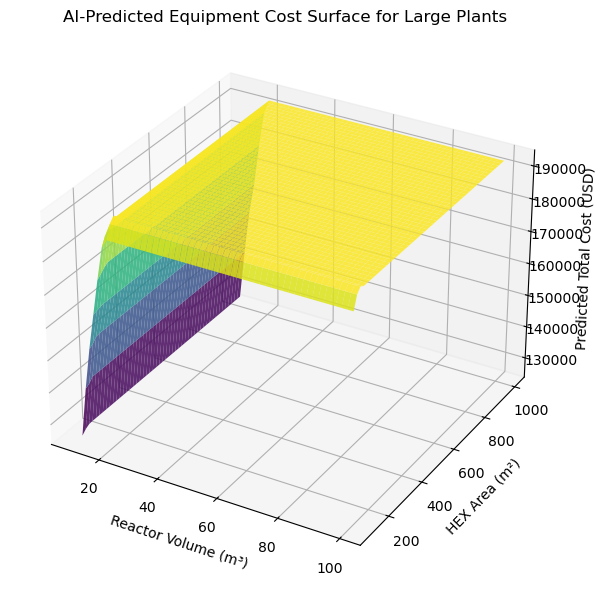

In [8]:
#AI-Based Cost Simulation for Larger Hydrogenation Plants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score

# --- Cost Estimation Function ---
def estimate_equipment_cost(size, size_ref, cost_ref, scaling_exponent=0.6, material_factor=1.0):
    return cost_ref * (size / size_ref) ** scaling_exponent * material_factor

# --- Cost parameters (based on Word file) ---
V_ref = 2.0
C_ref_reactor = 30000
n_rxr = 0.65
M_rxr = 1.3

A_ref = 50.0
C_ref_hex = 10000
n_hex = 0.6
M_hex = 1.1

# --- Step 1: Generate AI training data for smaller plants ---
np.random.seed(0)
n_samples = 300
V_samples = np.random.uniform(1, 20, n_samples)     # Reactor volume (m³)
A_samples = np.random.uniform(10, 150, n_samples)   # HEX area (m²)

cost_rxr = estimate_equipment_cost(V_samples, V_ref, C_ref_reactor, n_rxr, M_rxr)
cost_hex = estimate_equipment_cost(A_samples, A_ref, C_ref_hex, n_hex, M_hex)
total_cost = cost_rxr + cost_hex

df_cost = pd.DataFrame({
    'Volume_m3': V_samples,
    'Area_m2': A_samples,
    'Total_Cost_USD': total_cost
})

# --- Step 2: Train Random Forest model ---
X = df_cost[['Volume_m3', 'Area_m2']]
y = df_cost['Total_Cost_USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

# --- Optional: Evaluate model ---
y_pred = model.predict(X_test)
print(f"Model R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Model RMSE: ${mean_squared_error(y_test, y_pred, squared=False):.2f}")

# --- Step 3: Predict cost for larger plants (simulation grid) ---
V_sim = np.linspace(10, 100, 50)     # Larger volumes
A_sim = np.linspace(100, 1000, 50)   # Larger HEX areas

V_grid, A_grid = np.meshgrid(V_sim, A_sim)
V_flat = V_grid.ravel()
A_flat = A_grid.ravel()

X_sim = pd.DataFrame({
    'Volume_m3': V_flat,
    'Area_m2': A_flat
})

y_sim_pred = model.predict(X_sim)
Cost_grid = y_sim_pred.reshape(len(A_sim), len(V_sim))

# --- Step 4: Plot 3D cost surface ---
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(V_grid, A_grid, Cost_grid, cmap='viridis', alpha=0.85)
ax.set_xlabel('Reactor Volume (m³)')
ax.set_ylabel('HEX Area (m²)')
ax.set_zlabel('Predicted Total Cost (USD)')
ax.set_title('AI-Predicted Equipment Cost Surface for Large Plants')
plt.tight_layout()
plt.show()


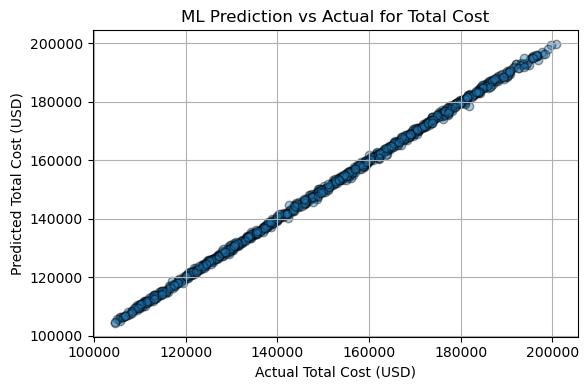

(160.27523332937398, 0.9107479427019949)

In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Generate random synthetic dataset
np.random.seed(42)
n_samples = 5000

# Random input features
conversion = np.random.uniform(0.7, 0.95, n_samples)
temperature = np.random.uniform(180, 250, n_samples)
pressure = np.random.uniform(10, 25, n_samples)
h2_toluene_ratio = np.random.uniform(2.5, 4.0, n_samples)

# Simulated outputs based on engineering-inspired logic
catalyst_base = 700
catalyst_weight = catalyst_base * (conversion / 0.90) ** 1.2
reactor_vol = catalyst_weight / 860
reactor_cost = 30000 + 2000 * reactor_vol

Q = 1000 + 5 * (temperature - 180) * conversion
area = Q / 0.5
hx_cost = 10000 + 300 * (area ** 0.7)

pressure_factor = 1 + 0.05 * (pressure - 10)
total_cost = (reactor_cost + hx_cost) * pressure_factor

# Build full dataset
df = pd.DataFrame({
    'conversion': conversion,
    'temperature': temperature,
    'pressure': pressure,
    'h2_toluene_ratio': h2_toluene_ratio,
    'catalyst_weight_kg': catalyst_weight,
    'reactor_volume_m3': reactor_vol,
    'Q_kW': Q,
    'HX_area_m2': area,
    'total_cost_USD': total_cost
})

# Step 2: ML Modeling
X = df[['conversion', 'temperature', 'pressure', 'h2_toluene_ratio']]
y = df[['reactor_volume_m3', 'HX_area_m2', 'total_cost_USD']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train ML model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot predicted vs actual for cost
plt.figure(figsize=(6, 4))
plt.scatter(y_test['total_cost_USD'], y_pred[:, 2], alpha=0.4, edgecolor='k')
plt.xlabel("Actual Total Cost (USD)")
plt.ylabel("Predicted Total Cost (USD)")
plt.title("ML Prediction vs Actual for Total Cost")
plt.grid(True)
plt.tight_layout()
plt.show()

(mae, r2)


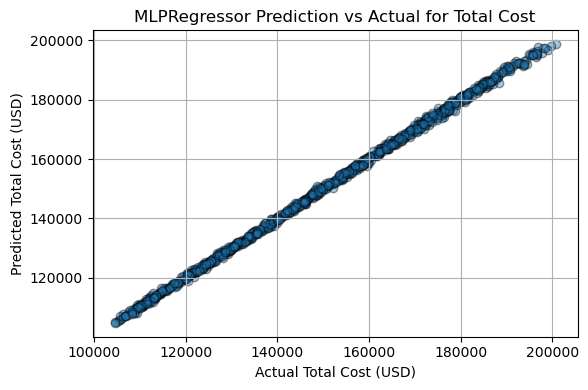

(192.61535255749394, 0.9990493911920243)

In [22]:
# from feedbacks nueral netwrok is used and it gave 0.999 r2 value meaning it can 99.9 percent variance in cost that is more accurate the random forest regressor.
from sklearn.neural_network import MLPRegressor

# Step 1: Generate random synthetic dataset
np.random.seed(42)
n_samples = 5000

# Random input features
conversion = np.random.uniform(0.7, 0.95, n_samples)
temperature = np.random.uniform(180, 250, n_samples)
pressure = np.random.uniform(10, 25, n_samples)
h2_toluene_ratio = np.random.uniform(2.5, 4.0, n_samples)

# Simulated outputs based on engineering-inspired logic
catalyst_base = 700
catalyst_weight = catalyst_base * (conversion / 0.90) ** 1.2
reactor_vol = catalyst_weight / 860
reactor_cost = 30000 + 2000 * reactor_vol

Q = 1000 + 5 * (temperature - 180) * conversion
area = Q / 0.5
hx_cost = 10000 + 300 * (area ** 0.7)
pressure_factor = 1 + 0.05 * (pressure - 10)
total_cost = (reactor_cost + hx_cost) * pressure_factor

# Build full dataset
df = pd.DataFrame({
    'conversion': conversion,
    'temperature': temperature,
    'pressure': pressure,
    'h2_toluene_ratio': h2_toluene_ratio,
    'catalyst_weight_kg': catalyst_weight,
    'reactor_volume_m3': reactor_vol,
    'Q_kW': Q,
    'HX_area_m2': area,
    'total_cost_USD': total_cost
})

# Redefine X and y
X = df[['conversion', 'temperature', 'pressure', 'h2_toluene_ratio']]
y = df[['reactor_volume_m3', 'HX_area_m2', 'total_cost_USD']]

# Redo train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to arrays
X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values

# Standardize
scaler_X = StandardScaler().fit(X_train_array)
scaler_y = StandardScaler().fit(y_train_array)

X_train_scaled = scaler_X.transform(X_train_array)
X_test_scaled = scaler_X.transform(X_test_array)
y_train_scaled = scaler_y.transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

# Train the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam',
                         max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train_scaled)

# Predict and inverse transform
y_pred_scaled = mlp_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Evaluate performance
mae = mean_absolute_error(y_test_array, y_pred)
r2 = r2_score(y_test_array, y_pred)

# Plot predicted vs actual for total cost
plt.figure(figsize=(6, 4))
plt.scatter(y_test_array[:, 2], y_pred[:, 2], alpha=0.4, edgecolor='k')
plt.xlabel("Actual Total Cost (USD)")
plt.ylabel("Predicted Total Cost (USD)")
plt.title("MLPRegressor Prediction vs Actual for Total Cost")
plt.grid(True)
plt.tight_layout()
plt.show()

(mae, r2)


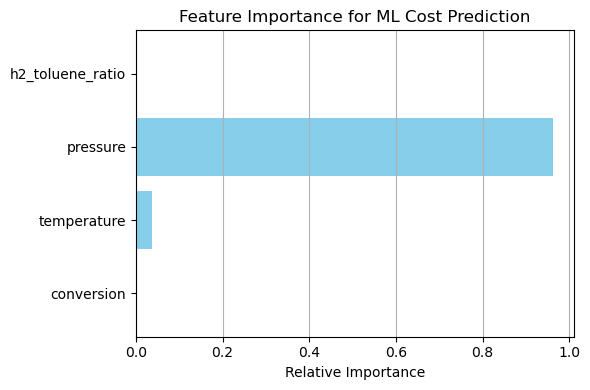

In [18]:
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(6, 4))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Relative Importance")
plt.title("Feature Importance for ML Cost Prediction")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()
